# **Executive Summary**

Overview

This project aims to explore the use of state-of-the-art machine learning techniques to analyze web browsing history for personal introspection. The primary goal is to identify patterns in my intellectual curiosity and use clustering algorithms to uncover latent thematic structures inherent in the corpus of web page titles over the course of four months.

Analysis Pipeline

1. Introduction and Motivation: The project begins with a personal motivation to understand intellectual curiosity by analyzing web browsing history.

2. Importing Data to Python: The web browsing history, extracted as a JSON file, is imported using Python libraries like numpy and json.

3. Pre-processing and Exploratory Analysis:
The dataset, comprising 38,808 web page titles, undergoes natural language processing. The document-term matrix (DTM) is formed, stop words are removed, lemmatization is performed, and bigrams/trigrams are introduced. Extreme words are filtered out, resulting in a processed corpus. Exploratory analysis is performed to visualize a word cloud within the corpora with most common words and average length of terms.

4. Task Formulation: The clustering task is framed as unsupervised learning, specifically as topic modeling, to unveil latent thematic structures in web page titles.

5. Model Selection and Background: The Latent Dirichlet Allocation (LDA) model is chosen for its ability to uncover latent thematic structures. The Dirichlet distribution is introduced as a key component and explained geometrically and intuitively with relevant examples to the topic.

6. LDA Model Training: The Expectation-Maximization (EM) algorithm is mathematically defined and guides the iterative training process, adjusting model parameters until convergence. Pseudocode provided for a clearer outline.

7. LDA Model Implementation: The model is implemented, modularized and well commented following PEP8 guidelines.

8. Evaluation Metrics: Coherence and perplexity scores are employed to evaluate the interpretability of generated topics and the model's predictive ability, respectively.

9. Results and Discussion: The evaluation results suggest stability in coherence and perplexity scores across different cluster counts. Visualization techniques like pyLDAvis and intertopic distance maps are used to interpret clusters.

10. Conclusion: Clustering is successfully implemented on a personally-curated web browsing dataset. Key findings are summarized.

11. References: Includes the main papers used in this project along with tutorials and models.

Key Findings
The LDA model with 10 topics performs well based on coherence scores.
Visualization tools reveal interpretable clusters related to personal experiences, internships, and academic topics.
The stability of coherence and perplexity scores suggests robust model performance.
Future Directions
Explore advanced techniques like BERT embeddings and transformer-based autolabeling for improved interpretability.
Consider training generative models for autolabeling clusters, further enhancing context-awareness.
Overall, this project demonstrates the applicability of machine learning in personal introspection through web browsing history analysis, offering insights into intellectual curiosity and potential directions for future work.



**Latest version commits (16 December, 2023):**
- formatted all code cells with Pep8 following best Python code guidelines
- added docstrings and comments to all code snippets
- hidden verbose from the notebook for cleaner outlook
- added 2 more models
- added diagram with evaluation metrics
- added PyLDAvis clustering via multidimensional scalling for optimal models
- full new section added with results and discussion
- added Executive summary with sections summaries, key findings, and general pipeline
- added a creative title for a publishable paper


**Note:** updates indicated with # [NEW VERSION]


# Section 1. Introduction and Motivation

In this project, I decided to explore a very personal question with the help of state-of-the-art machine learning techniques. Stepping into the fall semester of my third year, I intended to ideate my post-graduation life - what to do for a capstone thesis, exploring different career paths and various research topics. However, in reality, I was mainly focusing on my three academic courses, and in between my rigorous studying of neural networks and Monte Carlo simulations, I would sometimes look into a random Wikipedia page that says “Atmospheric Sounding” - a hot research topic in the field of satellite-based air quality measurement instruments. The pattern of going down the Wikipedia rabbit hole quite often, combined with my screen time usage (8-12 hours daily), led me to believe that my browsing history can be an accurate indicator of my intellectual curiosity and can help me figure out what I want to do with my future.

I took out all of my web browsing history for the past three months using the [Google Chrome extension](https://chrome.google.com/webstore/detail/export-chrome-history/dihloblpkeiddiaojbagoecedbfpifdj) that generated an easily comprehensible file for a computer - JSON format with fields for visit time, web page title, URL, and 504506 lines. It is obviously hard to look at the document and search for patterns myself. This was where machine learning was very helpful.
I collected all those web page titles and infused them into one corpus for clustering.



# Section 2. Importing Data to Python

I used numpy and json packages for the data structures and gensim, spacy and nltk for text-specific processing and visualizations.    

In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=aadba6e901c36b8c52db1d50614f72b3ee591ca008bb580bb13bed8bbc7a4249
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
# Import necessary libraries

import numpy as np
import json

# lda packages
import gensim
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import spacy
import nltk
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim

import pyLDAvis
import pyLDAvis.gensim
import warnings

warnings.filterwarnings("ignore", category = DeprecationWarning)

In [ ]:
# change pandas version for pyLDAvis
!pip install pandas==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.


In [ ]:
!pip install wordcloud

In [ ]:
!python3 -m spacy download en_core_web_sm
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

2023-12-17 00:52:48.902476: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 00:52:48.902562: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 00:52:48.908027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 00:52:51.563822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

[[0.        0.       ]
 [1.        0.       ]
 [0.5       0.8660254]]


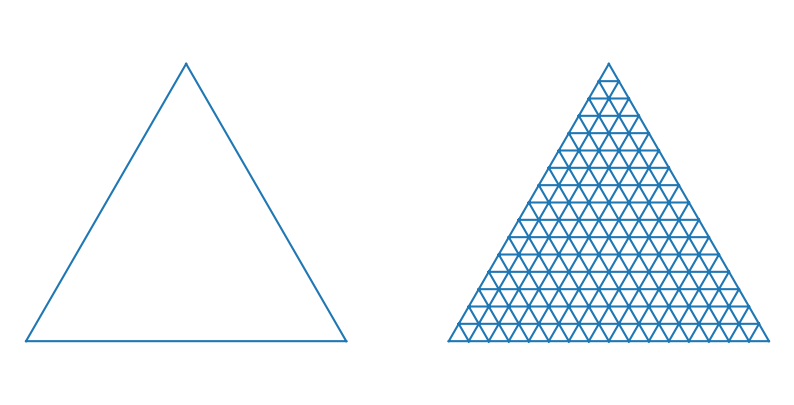

In [ ]:
"""
Code adapted from notebook.community
used later in the notebook
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce

# import seaborn
from math import gamma
from operator import mul

# Define the vertices of the equilateral triangle
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
print(corners)

# Create a triangulation of the vertices
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# Refine the triangulation for smoother visualization
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

# Calculate midpoints of triangle sides opposite each corner
midpoints = []
for i in range(3):
    point1 = corners[(i + 1) % 3]
    point2 = corners[(i + 2) % 3]
    mid = (point1 + point2) / 2.0
    midpoints.append(mid)

# Visualize the original triangle and the refined triangulation
plt.figure(figsize=(10, 5))
for i, shape in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i + 1)
    plt.triplot(shape)
    plt.axis("off")
    plt.axis("equal")


def xy2bc(xy, tol=1.0e-3):
    """
    Converts 2D Cartesian coordinates to barycentric coordinates.

    Parameters:
    - xy (numpy.ndarray): 2D Cartesian coordinates.
    - tol (float): Tolerance for numerical stability.

    Returns:
    - s (numpy.ndarray): Barycentric coordinates.
    """
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)


class Dirichlet(object):
    """
    Dirichlet distribution class.

    Parameters:
    - alpha (list or numpy.ndarray): Parameters of the Dirichlet distribution.
    """

    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(
            mul, [gamma(a) for a in self._alpha]
        )

    def pdf(self, x):
        """
        Returns the probability density function (pdf) value for the given point.

        Parameters:
        - x (list or numpy.ndarray): Point in the Dirichlet distribution.

        Returns:
        - pdf_value (float): Probability density function value.
        """
        return self._coef * reduce(
            mul, [xx ** (aa - 1) for (xx, aa) in zip(x, self._alpha)]
        )


def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    """
    Draw probability density function (pdf) contours for the Dirichlet distribution.

    Parameters:
    - dist (Dirichlet): Dirichlet distribution object.
    - nlevels (int): Number of contour levels.
    - subdiv (int): Number of subdivisions for triangulation.
    - **kwargs: Additional keyword arguments for contour plotting.
    """
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis("equal")
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis("off")


I load the JSON file and display the first 50 web page titles in the data set.

In [ ]:
# Preparing the Data

def load_data(file):
    """
    Load data from a JSON file.

    Parameters:
    - file (str): Path to the JSON file.

    Returns:
    - data (dict): Parsed data from the JSON file.
    """
    with open(file) as f:
        data = json.load(f)
    return data

In [ ]:
# Load Data
path_colab = "/content/web_browsing_history.json"
path_local = "/Users/zorin/cs156/web_browsing_history/web_browsing_history.json"

# Load data from the specified path (choose either Colab or local)
data = load_data(path_colab)

# Extract titles from the loaded data
docs = [data[i]["title"] for i in range(len(data))]

# Display the first 10 titles
print(docs[:10])

['Export Chrome History - Chrome Web Store', 'Export Chrome History - Chrome Web Store', 'how to export your tab history - Google Search', 'how to export your tab history - Google Search', 'YouTube', 'Your data in Maps', 'Your data in Maps', 'Timeline', 'Timeline', 'Timeline']


# Section 3. Pre-processing and Exploratory Analysis

I will define my dataset in natural language processing context. My collection of web page titles is the corpus of the data which comprises 38808 documents in total. Every title is a document under the bag-of-words (BOW) assumption - the order does not matter, only the terms (words) frequency.

The first general step is to form the document-term matrix (DTM) by tokenizing the documents. Each row corresponds to a document and each column is the occurence count of a term within the document. It is important to note that the frequency is estimated for every term on a corpus level so we can have zero values. Given the nature of the data, the DTM will be very sparse (mostly zeros) since the average length as shown below is 4.94 and the number of unique words is 6613.

After this, I remove the stop words since they do not add any meaning to the documents. I use a standard vocabulary from the nltk package as seen below.

Next, I perform lemmatization which is an essential process for reducing computation time and excessive information. It transforms the words to its roots (e.g. transformed -> transform).

Sometimes meaning cannot be inferred solely from one term. This is where bigrams and trigrams play a crucial role. For instance, individually, the words "machine" and "learning" have very different meanings alone compared to when combined together. Adding these two new types of terms will expand the dimensions of DTM and increase the complexity but will capture a more nuanced meaning in the model.   

Finally, I remove all the extreme words with a certain treshold below.

All these steps are combined into a single functin which returns the corpus variable that stores the document-term matrix.

In [ ]:
from gensim import corpora
from gensim.models import Phrases
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocess_documents(documents):
    """
    Preprocess a list of documents.

    Parameters:
    - documents (list): List of documents.

    Returns:
    - corpus (list): Document-term matrix.
    - id2word (gensim.corpora.Dictionary): Mapping of word IDs to words.
    - texts (list): Processed documents.
    """
    # Print the original document
    print("Original Document:")
    print(documents[0])

    # Tokenize documents
    tokenized_docs = [simple_preprocess(doc) for doc in documents]

    # Print tokenized document
    print("\nTokenized Document:")
    print(tokenized_docs[0])

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokenized_docs = [
        [word for word in doc if word not in stop_words] for doc in tokenized_docs
    ]

    # Print document after removing stop words
    print("\nDocument after removing stop words:")
    print(tokenized_docs[0])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokenized_docs = [
        [lemmatizer.lemmatize(word) for word in doc] for doc in tokenized_docs
    ]

    # Print document after lemmatization
    print("\nDocument after lemmatization:")
    print(tokenized_docs[0])

    # Create bigrams and trigrams
    bigram = Phrases(tokenized_docs, min_count=5, threshold=100)
    trigram = Phrases(bigram[tokenized_docs], threshold=100)
    texts = [trigram[bigram[doc]] for doc in tokenized_docs]

    # Print document after adding bigrams and trigrams
    print("\nDocument after adding bigrams and trigrams:")
    print(texts[0])

    # Create dictionary and document-term matrix
    id2word = corpora.Dictionary(texts)

    # Filter out extreme words
    id2word.filter_extremes(no_below=1, no_above=0.8)
    corpus = [id2word.doc2bow(doc) for doc in texts]

    # Print dictionary and document-term matrix for the first document
    print("\nDocument-Term Matrix:")
    print(corpus[0])

    return corpus, id2word, texts


corpus, id2word, texts = preprocess_documents(docs)

Original Document:
Export Chrome History - Chrome Web Store

Tokenized Document:
['export', 'chrome', 'history', 'chrome', 'web', 'store']

Document after removing stop words:
['export', 'chrome', 'history', 'chrome', 'web', 'store']

Document after lemmatization:
['export', 'chrome', 'history', 'chrome', 'web', 'store']

Document after adding bigrams and trigrams:
['export', 'chrome', 'history', 'chrome', 'web_store']

Document-Term Matrix:
[(0, 2), (1, 1), (2, 1), (3, 1)]


Exploratory Data Analysis:
Total number of documents: 38808
Total number of unique words: 6613
Average document length: 4.949933003504432


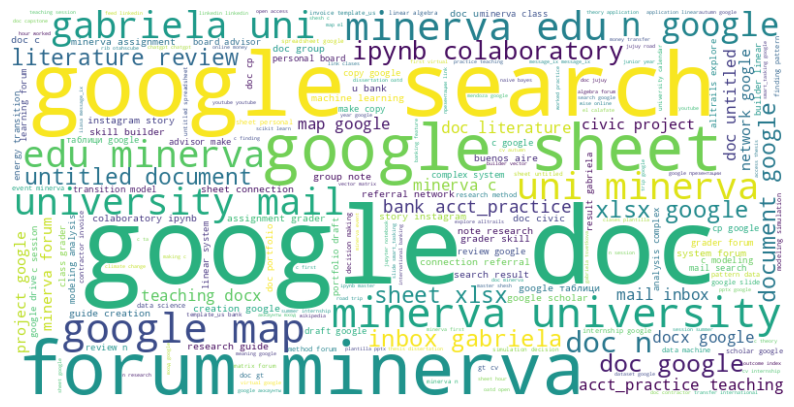

In [ ]:
# Exploratory Data Analysis
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def perform_eda(documents):
    """
    Perform Exploratory Data Analysis (EDA) on a list of documents.

    Parameters:
    - documents (list): List of documents.

    Returns:
    - None: Displays EDA results and a word cloud.
    """
    # Tokenize documents
    tokenized_docs = [simple_preprocess(doc) for doc in documents]

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokenized_docs = [
        [word for word in doc if word not in stop_words] for doc in tokenized_docs
    ]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokenized_docs = [
        [lemmatizer.lemmatize(word) for word in doc] for doc in tokenized_docs
    ]

    # Exploratory Data Analysis
    total_documents = len(documents)
    total_unique_words = len(set(word for doc in tokenized_docs for word in doc))
    average_doc_length = sum(len(doc) for doc in tokenized_docs) / total_documents

    print("Exploratory Data Analysis:")
    print("Total number of documents:", total_documents)
    print("Total number of unique words:", total_unique_words)
    print("Average document length:", average_doc_length)

    # Generate word cloud
    all_words = [word for doc in tokenized_docs for word in doc]
    wordcloud = WordCloud(
        width=800,
        height=400,
        random_state=21,
        max_font_size=110,
        background_color="white",
    ).generate(" ".join(all_words))

    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# Example usage
perform_eda(docs)

Note that the exploratory analysis was performed on the initial corpus before the preprocessing so most of the words occuring in the cloud might have been removed in the extreme words removal part.

# Section 4. Task Formulation

Clustering applied to my data falls into the category of unsupervised learning because there is no groundtruth labels. In the context of web page titles, the goal is to uncover latent thematic structures inherent in the corpus. The choice of clustering algorithm plays a pivotal role in shaping the outcomes of the analysis. Some algorithms take a fixed number of clusters while others offer flexibility, adapting the cluster count dynamically based on the inherent structure of the dataset. In machine learning literature, the task is defined as topic modelling.

In its raw form, each web page title can be seen as a high-dimensional vector in a space where each dimension corresponds to a unique word or term present in the titles. With a large vocabulary, the dimensionality of this space becomes substantial, potentially leading to computational complexity and increased difficulty in interpreting the relationships between titles.

By employing clustering algorithms for topic modeling, the task essentially transforms this high-dimensional space into a lower-dimensional representation characterized by clusters or topics. Each cluster serves as a condensed representation of a set of titles that share common thematic content.


Formally,

Given a set of $N$ web page titles $D = \{d_1, d_2, \ldots, d_N\}$, the task is to partition the titles into $k$ clusters $(C_1, C_2, \ldots, C_k)$, where each cluster represents a distinct topic or thematic category. The objective is to discover latent topics inherent in the titles and assign each title to one of the $k$ clusters in a way that maximizes the intra-cluster similarity and minimizes the inter-cluster similarity.


# Section 5. Model Selection and Background

A well-established model for the task is Latent Dirichlet Allocation (LDA). It was  first introduced by David M. Blei, Andrew Y. Ng, and Michael I. Jordan in their 2003 paper titled "Latent Dirichlet Allocation." It is particularly designed for uncovering latent thematic structures within a collection of documents. LDA assumes a generative process for document creation. It posits that documents are mixtures of topics, and each topic is a probability distribution over words. In turn, each document is generated by choosing a distribution of topics and then selecting words based on those topic distributions.

Since the model is classified as undirected generative, then it is the joint probability distribution on the observable data and the unobservable latent variables $P(X, Z) = P(X | Z)P(Z)$, where $X$ represents the observable data and
$Z$ represents the unobservable latent variables.

The main idea behind the generative model is that the documents are expressed as mixtures over topics, that themselves comprise distribution over terms. Below is the pseudocode for the generative process.


**Generative Process in Latent Dirichlet Allocation (LDA)**

**Input:** Number of documents \(M\), Number of topics \(K\), Dirichlet parameters $\alpha$ and $\beta$

**Output:** Generated corpus of documents

1. **for** $m = 1$ **to** $M$:
    1. Sample topic distribution $\theta_m \sim \text{Dirichlet}(\alpha)$
    2. **for** $n = 1$ **to** $N_m$:
        1. Sample topic assignment $z_{m,n} \sim \text{Multinomial}(\theta_{m})$
        2. Sample word $w_{m,n} \sim \text{Multinomial}(\beta_{z_{m,n}})$



We see that we have the Dirichlet distribution parametrized on $\alpha$ for every document. This intuitively can be interpreted as sampling a $k$-dimensional vector for which each term $i$ represents the probability of that topic being part of cluster $i$. In other words - ditribution of distribution. Those are the weights or the mixture coefficients mentioned ealier.

## 5. 1 Dirichlet Distribution

The motivation behind using the Dirichlet distribution as mentioned in the original paper is due to its membership in the exponential family of distributions, finite-dimensional statistics, and the fact that it is the conjugate prior to the multinomial distribution which makes the training process easily computable.

Geometrically, the distribution is a simplex which is a generalization of the notion of a triangle in higher dimensions. To gain intuition, I will visualize it in a two-dimensional setting with $K = 3$ and different values for $\alpha$ which is also referred as concentration hyperparameter and we will see why in the plots:

Let $$ X = (X1, X2, X3) \sim Dir(\alpha)$$

In the plot below we see a uniform distribution and the density being distributed equally over the whole simplex.  

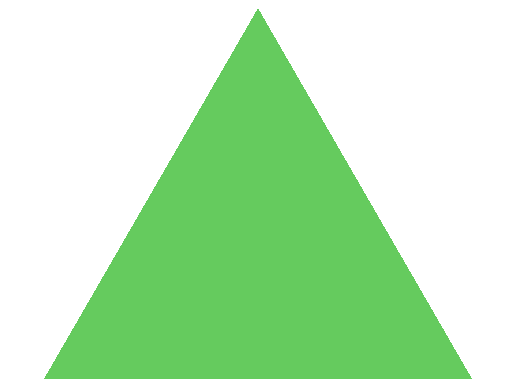

In [ ]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

If the concentration parameters are bigger then 1, then the density is concencrated towards the center.

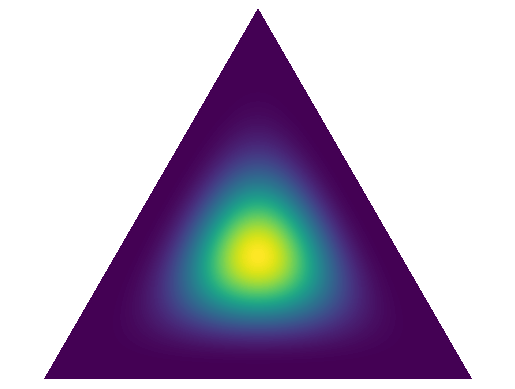

In [ ]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

In this case the parameters are asymmetric and we see that the density is  biased towards right edge.

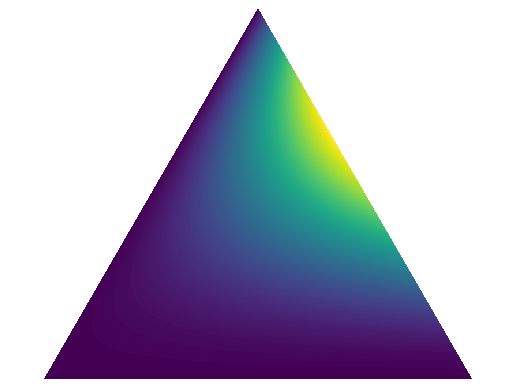

In [ ]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

If $alpha_{i} < 1$ then we have a sparse concentration tending towards the simplex vertices.

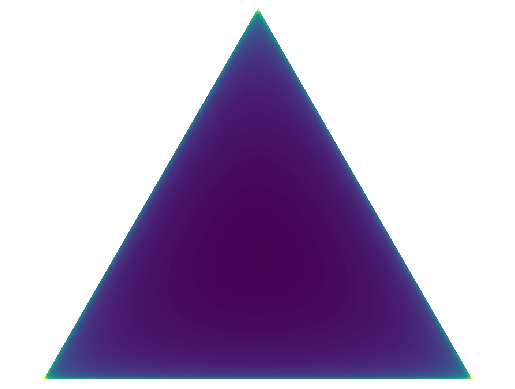

In [ ]:
draw_pdf_contours(Dirichlet([0.9, 0.9, 0.9]))

In the context of generating our documents, we want a sparse prior since we assume that they will be composed of a limited number of dominant topics, and we expect the majority of the topics to contribute minimally to each document. This sparsity assumption aligns with the notion that documents often focus on specific themes or subjects, with only a subset of potential topics being relevant in any given instance. By incorporating a sparse prior, we aim to encourage the generation of documents that exhibit clear thematic coherence and are representative of the assumed sparsity in the underlying topics. In section 7 I test different priors.

Let's go back to the generative process. Below is a diagram from the original paper that clearly outlines the relationships between the different parameters:

- $\theta$ is conditioned on $\alpha$: Denotes that the document-specific topic distribution is generated from a Dirichlet distribution with parameter $\alpha$.
- $z_{dn}$ is conditioned on $\theta$: Denotes that the topic assignment for each word is generated from the document-specific topic distribution $\theta$.

- $w_{dn}$ is conditioned on $z_{dn}$
- $\beta$: Denotes that the observed word is generated from a multinomial distribution with parameters based on the assigned topic and the global word distribution.

## 5.2 Intutive Example

Generation Process

**Vocabulary:**

Word 1
Word 2
Word 3
Topics:

Topic A: Dominated by Word 1
Topic B: Mix of Word 2 and Word 3

**Topic Distribution for Each Document:**

Document 1: Topic A
Document 2: Topic B
Document 3: Topic A
Document 4: Topic B


**Word Generation Process:**

Each document is assigned a topic, and words are generated based on the assigned topic.


**Resulting Documents:**

Document 1: A composition dominated by Word 1
Document 2: A blend of Word 2 and Word 3
Document 3: Emphasis on Word 1
Document 4: Exploration of Word 2 and Word 3

# Section 6. LDA Model Training

As in every generative model, we want to adjust the parameters until the difference between the distribution of our actual data and the distribution generated by the model converges to a minimal value. In other words, we are trying to match the model parameters to the observed data distributions defining the clusters.

The iteration steps are led by the Expectation-Maximization (EM) algorithm. As always, we start with a random initialization for the model parameters - if we do not have any prior data about the topics, then we assume a symmetric sparse concentration prior. The number of clusters must also be provided.

In the Expectation step (E-step), we infer the latent variables, specifically the posterior distribution of the latent variables (topics assigned to each word). For each document $d$ and each word $w$ in the document, we estimate the posterior distribution $(p(z_{d,w} | \mathbf{w}, \boldsymbol{\alpha}, \boldsymbol{\beta})$ where $z_{d,w}$ is the topic assigned to word $w$ in document $d$, $\mathbf{w}$ is the set of all words, $\boldsymbol{\alpha}$ is the Dirichlet parameter for document-topic distributions, and $\boldsymbol{\beta}$ is the Dirichlet parameter for topic-word distributions.

The posterior distribution is computed using Bayes' rule:

$$
p(z_{d,w} | \mathbf{w}, \boldsymbol{\alpha}, \boldsymbol{\beta}) \propto p(\mathbf{w} | z_{d,w}, \boldsymbol{\beta}) \cdot p(z_{d,w} | \boldsymbol{\alpha})
$$

where $(p(\mathbf{w} | z_{d,w}, \boldsymbol{\beta})$ is the likelihood of observing the words given the assigned topic, and $p(z_{d,w} | \boldsymbol{\alpha})$ is the prior probability of a topic in a document.

After the E-step, we compute the expected counts of topics in each document and the expected counts of words assigned to each topic.

In the Maximization step (M-step), we update the model parameters using the expected counts obtained in the E-step. The updates are performed using the formula for updating the parameters of a Dirichlet distribution given the expected counts:

$$
\alpha_{d,k} \propto \alpha_{d,k} + \sum_{w} \mathbb{E}[z_{d,w} = k]
$$

This process is iteratively repeated until convergence or a predefined number of iterations, refining the model's understanding of the underlying topic structure.


# Section 7. LDA Model Implementation


In [ ]:
# Import the gensim library
import gensim
from gensim.models import CoherenceModel


def train_and_evaluate_lda(num_topics, alpha, corpus, id2word, texts=texts):
    """
    Train and evaluate an LDA (Latent Dirichlet Allocation) model.

    Parameters:
    - num_topics (int): Number of topics to identify in the corpus.
    - alpha (str or list): Hyperparameter controlling document-topic sparsity
      (set to "auto" for automatic estimation or provide a list for fixed values).
    - corpus (list): Document-term matrix.
    - id2word (gensim.corpora.Dictionary): Mapping from word IDs to words.
    - texts (list): Processed documents.

    Returns:
    - lda_model (gensim.models.LdaModel): Trained LDA model.
    - evaluation_scores (tuple): Coherence score and number of topics.
    """
    # Create an LDA model
    lda_model = gensim.models.ldamodel.LdaModel(
        corpus=corpus,  # The document-term matrix (DTM) in the form of a corpus
        id2word=id2word,  # Mapping from word IDs to words (dictionary)
        num_topics=num_topics,  # Number of topics to identify in the corpus
        random_state=100,  # Seed for reproducibility
        update_every=1,  # How often to update the model (set to 1 for every iteration)
        chunksize=100,  # Number of documents to use in each training chunk
        passes=10,  # Number of passes through the entire corpus during training
        alpha=alpha,  # Hyperparameter controlling document-topic sparsity
        # (set to "auto" for automatic estimation)
        per_word_topics=True,  # Whether to compute per-word topic probabilities
    )

    # Compute coherence score
    coherence_model = CoherenceModel(
        model=lda_model, texts=texts, dictionary=id2word, coherence="c_v"
    )
    coherence_score = coherence_model.get_coherence()

    # Compute perplexity score
    perplexity_score = lda_model.log_perplexity(corpus)

    # Print results
    print(f"Number of Topics: {num_topics}")
    print(f"Alpha: {alpha}")
    print(f"Coherence Score: {coherence_score}")
    print(f"Perplexity Score: {perplexity_score}")

    return lda_model, (coherence_score, num_topics)


In [ ]:
# Combinations with different hyper-parameters
scores = []

# NUM TOPICS = 15, ALPHA = "auto"
model1, score1 = train_and_evaluate_lda(num_topics=15,
                                       alpha="auto",
                                       corpus=corpus,
                                       id2word=id2word
                                      )
scores.append(score1)

# NUM TOPICS = 20, ALPHA = "symmetric"
model2, score2 = train_and_evaluate_lda(num_topics=20,
                                    alpha="symmetric",
                                    corpus=corpus,
                                    id2word=id2word
                                )
scores.append(score2)

# NUM TOPICS = 25, ALPHA = "asymmetric"
model3, score3 = train_and_evaluate_lda(num_topics=25,
                                    alpha="asymmetric",
                                    corpus=corpus,
                                    id2word=id2word
                                )
scores.append(score3)

# NUM TOPICS = 30, ALPHA = [0.01] * 30
model4, score4 = train_and_evaluate_lda(num_topics=30,
                                    alpha=[0.01] * 30,
                                    corpus=corpus,
                                    id2word=id2word
                                )
scores.append(score4)

Number of Topics: 15
Alpha: auto
Coherence Score: 0.4610164300245521
Perplexity Score: -9.841636115648845
Number of Topics: 20
Alpha: symmetric
Coherence Score: 0.35660841620692824
Perplexity Score: -21.43677813804442
Number of Topics: 25
Alpha: asymmetric
Coherence Score: 0.31443930849346186
Perplexity Score: -25.533793679305024
Number of Topics: 30
Alpha: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
Coherence Score: 0.3612199132062449
Perplexity Score: -44.789496748046936


In [ ]:
# NUM TOPICS = 10, ALPHA = [0.01] * 10
model5, score5 = train_and_evaluate_lda(num_topics=10,
                                    alpha=[0.01] * 10,
                                    corpus=corpus,
                                    id2word=id2word
                                )
scores.append(score5)

Number of Topics: 10
Alpha: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
Coherence Score: 0.5519428225304387
Perplexity Score: -9.199961394526575


In [ ]:
# NUM TOPICS = 5, ALPHA = [0.01] * 5
model6, score6 = train_and_evaluate_lda(num_topics=5,
                                    alpha=[0.01] * 5,
                                    corpus=corpus,
                                    id2word=id2word
                                )
scores.append(score6)

Number of Topics: 5
Alpha: [0.01, 0.01, 0.01, 0.01, 0.01]
Coherence Score: 0.5081308600044248
Perplexity Score: -7.605042570575175


# Section 8. Evaluation Metrics

In the evaluation of topic models, two commonly used metrics are the coherence score and perplexity score. The coherence score serves as a measure of the interpretability of the generated topics. It is computed as the mean of pairwise word co-occurrence scores within the top words of each topic. Mathematically, the coherence score (CS) for $k$ topics is given by:

$$
CS = \frac{1}{k} \sum_{i=1}^{k} \sum_{j=1, j\neq i}^{k} \text{Score}(\text{TopWords}(T_i), \text{TopWords}(T_j))
$$

where $T_i$ represents the $i$-th topic, $\text{TopWords}(T_i)$ denotes the set of top words in topic $T_i$, and $\text{Score}(\text{TopWords}(T_i), \text{TopWords}(T_j))$ is a measure of co-occurrence between the top words of topics $T_i$ and $T_j$.

On the other hand, the perplexity score gauges the model's ability to predict a held-out test dataset. It is calculated as the inverse probability of the test set normalized by the number of words. The perplexity score (PP) for a test dataset $\mathbf{D}$ is expressed as:
$$
PP(\mathbf{D}) = \exp\left(-\frac{\sum_{d=1}^{D} \log(p(\mathbf{w}_d))}{\sum_{d=1}^{D} N_d}\right)
$$
where $D$ is the number of documents in the test dataset, $\mathbf{w}_d$ is the word sequence in document $d$, $N_d$ is the number of words in document $d$, and $p(\mathbf{w}_d)$ is the likelihood of the word sequence $\mathbf{w}_d$ under the model.


Looking at the metrics of my trained models with varying the number of classes and $\alpha$ we see that the CS and PP do not change for the different number of clusters. This stability in CS and PP suggests that the performance of the models, as measured by their ability to capture coherent topics and manage the uncertainty of predicting unseen data, is not significantly impacted by changes in the number of clusters. This finding implies that the inherent structure and coherence within the data, as captured by the model, remain robust even when adjusting the level of granularity represented by the number of clusters.

# Section 9. Results and Discussion [NEW VERSION]

In this work I use three approaches to evaluate my topic models. First, I plot the coherence scores (see section 8) over the number of topics and see that the models with 10 topics performs the best according to my metric. This is a reasonable amount of topics given my insights into the personal data. The difference between the model with 15 topics is small and this is why I decided to look into both models' topic distributions and top words to interpret the clusters. Also, coherence score is not an objective measure and vary for different datasets because it simply accounts for the shared words between topics but this is based on the specific data. I then reduce the dimensionality to only 2 dimensions with pyLDAvis library and analyze the plots.

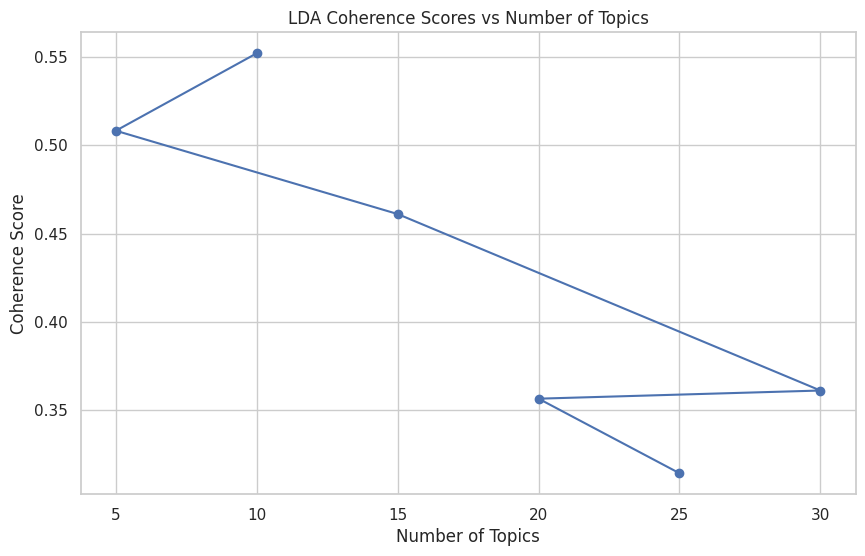

In [ ]:
# [NEW VERSION]

import matplotlib.pyplot as plt
import seaborn as sns


def plot_coherence_scores(scores):
    """
    Plot LDA Coherence Scores against the Number of Topics.

    Parameters:
    - scores (list): List of tuples containing coherence scores and corresponding
      number of topics.

    Returns:
    - None: Displays the coherence score plot.
    """
    # Extracting coherence scores and number of topics into separate lists
    sorted_scores = sorted(scores, key=lambda x: x[0])
    coherence_scores = [score for score, _ in sorted_scores]
    num_topics = [num_topics for _, num_topics in sorted_scores]

    # Plotting with seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics, coherence_scores, marker="o", linestyle="-", color="b")

    # Adding title and labels
    plt.title("LDA Coherence Scores vs Number of Topics")
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence Score")

    # Display the plot
    plt.show()


# Example usage
plot_coherence_scores(scores)


The following code snippet shows the my top 10 words for my trained lda model with 10 topics. The first cluster seems related to my internship this summer which was research work on the satellites schedulling problem. The rest of the clusters are also not very interpretable. I notice that the mixtures for most of the words are below 0.1 which implies that there are many words that have little frequency compared to the corpora. It seems like my topics overlap so I need to increase the number of clusters even though the coherence score is high.

In [ ]:
# [NEW VERSION]

# print topics with top 10 words
model5.print_topics(num_topics = 10, num_words = 10)

[(0,
  '0.205*"pulp" + 0.082*"documentation" + 0.070*"ipynb" + 0.055*"master" + 0.049*"learning" + 0.035*"machine" + 0.035*"example" + 0.027*"data" + 0.026*"fastapi" + 0.024*"design"'),
 (1,
  '0.547*"google" + 0.170*"doc" + 0.135*"sheet" + 0.013*"вход" + 0.013*"аккаунты" + 0.012*"scholar" + 0.009*"account" + 0.008*"sign" + 0.008*"career" + 0.007*"job"'),
 (2,
  '0.100*"main" + 0.068*"cubesats" + 0.063*"task_heater_scheduling_applied" + 0.063*"rib_otahscube_optimal" + 0.057*"jl" + 0.055*"teaching" + 0.054*"docx" + 0.053*"otahscube" + 0.053*"rib_otahscube" + 0.049*"bank"'),
 (3,
  '0.181*"literature" + 0.067*"scheduling" + 0.057*"python" + 0.042*"analysis" + 0.038*"wise" + 0.025*"api" + 0.021*"trello" + 0.020*"based" + 0.018*"process" + 0.018*"introduction"'),
 (4,
  '0.283*"search" + 0.164*"network" + 0.163*"connection" + 0.163*"referral" + 0.027*"result" + 0.026*"milp" + 0.012*"science" + 0.011*"simple" + 0.006*"board" + 0.005*"install"'),
 (5,
  '0.261*"minerva" + 0.174*"forum" + 0.0

Below is an intertopic distance map via multidimensional scaling. The relevance score for a term within a given topic is calculated as a combination of two factors:

- Term-Specificity (Frequency): This factor accounts for how unique or specific a term is to a particular topic. It is calculated as the ratio of the term's probability within the topic to its probability across all topics. If a term is more specific to a particular topic, its relevance score will be higher.

- Term-Salience (Frequency): This factor accounts for how frequently a term occurs in the entire corpus. Terms that are more salient in the overall corpus are considered more relevant. It is calculated as the term's probability within the topic multiplied by a scaling factor, which is typically a decreasing function of the term's overall frequency.

The relevance score is the sum of these two factors, and it helps in selecting terms that are both specific to a topic and salient in the entire corpus. Terms with higher relevance scores are then chosen as representative of the topic.

Each topic is represented as a circle with size scaled according to the frequency of top n relevant words out of the whole corpora. The closer the bubbles, the more similar they are based on their top n words. It seems that all the clusters do not overlap which means that their top terms are not used more than once.

The third topic in the result can be interpreted as travelling in Argentina including words such as "spanish duolingo", "alltrails", "recoleta". The rest cannot be interpreted that easily as expected by the topic term distribution described above. Clusters 6 and 2 look similar because they are related to Minerva logistics. This is represented by the closeness of the two bubbles.

In [ ]:
# [NEW VERSION]

#Creating Topic Distance Visualization
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model5, corpus, id2word, mds='mmds')
p

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017004  0.095933       1        1  24.049322
7      0.088787 -0.438554       2        1  13.402975
6     -0.348049 -0.137079       3        1   9.513197
4     -0.250881  0.393711       4        1   9.183932
5      0.280724 -0.308973       5        1   8.967730
9      0.380630 -0.038658       6        1   8.786365
0      0.082059  0.422840       7        1   8.211280
3     -0.228324 -0.355005       8        1   6.059488
8     -0.420330  0.109124       9        1   6.015160
2      0.398380  0.256663      10        1   5.810551, topic_info=                           Term          Freq         Total Category  logprob  \
4                        google  22825.000000  22825.000000  Default  30.0000   
14                      minerva   8603.000000   8603.000000  Default  29.0000   
5                        search   4507.000000   4507.000000  Default  28.0000   
402                         doc   7112.000000   7112.000000  Default  27.0000   
476                      review   3847.000000   3847.000000  Default  26.0000   
...                         ...           ...           ...      ...      ...   
6796   optimal_power_management     48.045917     49.504367  Topic10  -5.3471   
6797  quality_service_assurance     34.267441     35.491861  Topic10  -5.6851   
6640              mixed_integer    109.565286    142.316177  Topic10  -4.5227   
6910                    etascon    119.961631    320.650644  Topic10  -4.4321   
6912                rib_etascon    119.961631    320.650644  Topic10  -4.4321   

      loglift  
4     30.0000  
14    29.0000  
5     28.0000  
402   27.0000  
476   26.0000  
...       ...  
6796   2.8156  
6797   2.8104  
6640   2.5840  
6910   1.8623  
6912   1.8623  

[371 rows x 6 columns], token_table=      Topic      Freq                             Term
term                                                  
1864      5  0.863923                          absence
126       1  0.996043                          account
3669     10  0.996833                    acct_practice
498       1  0.894472                         activity
1114      4  0.973284                              add
...     ...       ...                              ...
1170      1  0.997560                             вход
416       1  0.979264                               за
2518      6  0.993677           интернет_банкиране_kbc
1952      1  0.944232  неозаглавена_електронна_таблица
1953      1  0.980819                          таблици

[408 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 7, 5, 6, 10, 1, 4, 9, 3])

This is the topic term distribution for my 15-cluster model. Topics 3 and 4 are interesting. The third one can be interpreted as themes related to my capstone seminar this semester. Topic 2 fully represents my internship project about satellite tasking using optimization algorithms and especially linear programming. Topic 4 is related to learning and software development which makes sense. This topic distribution is plausible.

In [ ]:
# [NEW VERSION]

# print topics with top 10 words for optimal model with k = 15
model1.print_topics(num_topics = 15, num_words = 10)

[(0,
  '0.177*"colaboratory" + 0.163*"ipynb" + 0.128*"master" + 0.096*"otahscube_pulp" + 0.081*"example" + 0.042*"algorithm" + 0.036*"py" + 0.035*"personal" + 0.030*"simulation" + 0.026*"copy"'),
 (1,
  '0.365*"google" + 0.141*"search" + 0.114*"doc" + 0.090*"sheet" + 0.027*"teaching" + 0.027*"docx" + 0.024*"instagram" + 0.024*"bank" + 0.024*"acct_practice" + 0.021*"template_us"'),
 (2,
  '0.137*"model" + 0.086*"linear" + 0.084*"scheduling" + 0.072*"programming" + 0.065*"problem" + 0.062*"linkedin" + 0.059*"modeling" + 0.044*"milp" + 0.043*"sciencedirect" + 0.036*"optimization"'),
 (3,
  '0.360*"documentation" + 0.123*"capstone" + 0.097*"project" + 0.057*"faq_junior_year" + 0.046*"scikit_learn" + 0.033*"tutorial" + 0.029*"seminar" + 0.023*"welcome" + 0.015*"skill" + 0.011*"builder"'),
 (4,
  '0.111*"fastapi" + 0.094*"science" + 0.086*"api" + 0.068*"based" + 0.063*"datacamp" + 0.058*"basic" + 0.052*"app" + 0.050*"learn" + 0.046*"concept" + 0.038*"first"'),
 (5,
  '0.196*"online" + 0.141*

In [ ]:
# [NEW VERSION]

#Creating Topic Distance Visualization
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(model1, corpus, id2word, mds='mmds')
p

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.428470  0.304237       1        1  37.603899
8     -0.476871 -0.020251       2        1  13.780207
7     -0.417743 -0.272680       3        1  12.296441
6     -0.150221 -0.393472       4        1   7.456337
2      0.365821 -0.317772       5        1   6.084688
13     0.078761 -0.472718       6        1   5.504471
0      0.226078  0.435762       7        1   4.743860
3     -0.114811 -0.103949       8        1   3.775415
4     -0.129724  0.151959       9        1   2.425369
9     -0.111473  0.418284      10        1   1.703013
11     0.153275  0.225209      11        1   1.563372
5      0.254931 -0.159113      12        1   1.438270
10     0.400064  0.076139      13        1   1.258286
12     0.167209  0.059186      14        1   0.191271
14     0.183177  0.069179      15        1   0.175100, topic_info=            Term          Freq         Total Category  logprob  loglift
4         google  23863.000000  23863.000000  Default     30.0  30.0000
14       minerva   7548.000000   7548.000000  Default     29.0  29.0000
342      network   4543.000000   4543.000000  Default     28.0  28.0000
5         search   9212.000000   9212.000000  Default     27.0  27.0000
4544  connection   4415.000000   4415.000000  Default     26.0  26.0000
...          ...           ...           ...      ...      ...      ...
6637        atta      0.041469      1.295460  Topic15     -8.9   2.9059
6638          ph      0.041469      1.295460  Topic15     -8.9   2.9059
6639      soumen      0.041469      1.295460  Topic15     -8.9   2.9059
135      solving      0.041469      1.302548  Topic15     -8.9   2.9004
6622        pulp      0.041469   1639.706511  Topic15     -8.9  -4.2375

[504 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
126       1  0.997682                 account
3669      1  0.999145           acct_practice
4333      7  0.992373                 advisor
1459      9  0.989773                      ai
285       6  0.998761                    aire
...     ...       ...                     ...
7        10  0.997416                 youtube
1169      1  0.998125                аккаунты
118       6  0.967928           вх_поща_gmail
1170      1  0.998547                    вход
2518     12  0.987718  интернет_банкиране_kbc

[299 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 8, 7, 3, 14, 1, 4, 5, 10, 12, 6, 11, 13, 15])

As mentioned earlier, the topic distribution makes sense and the clustering is plausible.

# Section 10. Conclusion [NEW VERSION]

This work involved the application of clustering techniques to dissect a personally-curated dataset derived from my four-month web browsing history. The primary discoveries unveiled a probable optimal cluster count of approximately 15. As anticipated, the prominent topics prominently featured the satellite scheduling problem and Minerva logistics. Additionally, I emphasized that relying solely on the coherence score as a metric for LDA evaluation may be subjective, given its dependence on the dataset. I underscored the significance of complementing quantitative metrics with qualitative insights from clustering visualizations to achieve a more comprehensive assessment of the model's performance.

# Section 11. References

Tutorial:

http://brandonrose.org/clustering#Latent-Dirichlet-Allocation

Model:

https://tedboy.github.io/nlps/_modules/gensim/models/ldamodel.html#LdaModel


Main Paper:

Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.

Sievert, C., & Shirley, K. (2014, June). LDAvis: A method for visualizing and interpreting topics. In Proceedings of the workshop on interactive language learning, visualization, and interfaces (pp. 63-70).




Alokaili, A., Aletras, N., & Stevenson, M. (2020, July). Automatic generation of topic labels. In Proceedings of the 43rd international ACM SIGIR conference on research and development in information retrieval (pp. 1965-1968).



# Section 12. HC Appendix

**hc**#organization: I organize my project effectively with a relevant executive summary and eleven sections.